# Глубинное обучение, ИИ ВШЭ

## Домашнее задание 3. Детекция объектов.

### Общая информация

### Оценивание и штрафы

Максимально допустимая оценка за работу без бонусов — 10 баллов. Сдавать задание после указанного срока жесткого дедлайна нельзя.

Сдача работы после мягкого дедлайна штрафуется ступенчато, -1 балл в сутки. Один раз за модуль студентам предоставляется возможность использовать отсрочку и сдать в жесткий дедлайн без штрафа.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке. Также оценка может быть снижена за плохо читаемый код и плохо оформленные графики. Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.

Использование генеративных моделей допустимо на следующих условиях:
- Количество кода, написанное генеративными моделями, не превышает 30%
- Указана модель, использованная для генерации, а также промпт
- В конце работы необходимо описать свой опыт использования генеративного ИИ для решения данного домашнего задания. Укажите как часто Вам приходилось исправлять код своими руками или просить модель что-то исправить. Было ли это быстрее, чем написать код самим?

В случае невыполнения этих требований работа не оценивается и оценка за неё не превышает 0 баллов.

### О задании

Сыграем в квиддич? Или лучше в карты?

В этом дз вам предстоит написать практически с нуля архитектуру для детекции, а также воспользоваться готовым решением. На выбор даётся два датасета, отличаются они только картинками. Форматы, баллы - все одинаково.

Первый вариант это датасет по кадрам игры в квиддич из Гарри Поттера. Если вы забыли правила, то нажмите [сюда](https://harrypotter.fandom.com/ru/wiki/%D0%9A%D0%B2%D0%B8%D0%B4%D0%B4%D0%B8%D1%87). Вы научитесь искать и выделять на фотографиях бладжеры, квоффл и снитч.

Второй вариант это датасет с игральными картами. Если вы забыли что такое карты, то нажмите [сюда](https://ru.wikipedia.org/wiki/%D0%98%D0%B3%D1%80%D0%B0%D0%BB%D1%8C%D0%BD%D1%8B%D0%B5_%D0%BA%D0%B0%D1%80%D1%82%D1%8B). Вы научитесь искать и выделять на фотографиях несколько типов карт.

Оба варианта содержат около 300 картинок, данные хранятся в xml в формате PascalVOC. Есть малые отличия, но ничего страшного.


Если с самописным детектором совсем не получается, то можно после создания датасетов перейти к концу, где обучается готовый, с ним будет проще :)

### Консультация 2023 года

https://www.youtube.com/watch?v=oCwEmKW3bYg

# Notes

Дз проверялось на работоспособность в colab. Не гарантируется, что будет работать на чем-то другом. На Windows, скорее всего, вас ждет немало проблем :(

По вопросам формулировок (не ошибок торча!), в случае отсутствия ответа в общем чате (поиск по чату позволяет проверить), можно написать в него с тегом @markblumenau.

## Данные

Скачайте один из датасетов на свой вкус и начните работу с ним.
Разметка находится в xmls папке, картинки в images.

In [1]:
!rm -rf /kaggle/working/*

In [2]:
!pip install ultralytics -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 62.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 62.8 MB/s eta 0:00:00


In [3]:
# Harry Potter -- uncomment
!wget https://github.com/markblumenau/hw3_iad_dl/raw/main/harry/data.zip

# Cards -- uncomment
#!wget https://github.com/markblumenau/hw3_iad_dl/raw/main/cards/data.zip
import glob
import shutil
from pathlib import Path
from xml.etree import ElementTree as ET

import albumentations as A
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import ultralytics
from albumentations.pytorch.transforms import ToTensorV2
from matplotlib.patches import Rectangle
from PIL import Image
from torch import nn
from torchvision.models import ResNet50_Weights
from tqdm.notebook import tqdm

!unzip -q data.zip

--2025-05-14 09:24:01--  https://github.com/markblumenau/hw3_iad_dl/raw/main/harry/data.zip
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/markblumenau/hw3_iad_dl/main/harry/data.zip [following]
--2025-05-14 09:24:01--  https://raw.githubusercontent.com/markblumenau/hw3_iad_dl/main/harry/data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17592727 (17M) [application/zip]
Saving to: ‘data.zip’

data.zip            100%[===================>]  16.78M  --.-KB/s    in 0.06s   

2025-05-14 09:24:02 (266 MB/s) - ‘data.zip’ saved [17592727/17592727]

Creating new Ultralytics Settings v0.0.6 file ✅

# Задача 1. 0.5 балла.

Ниже написан код для стандартного Dataset из библиотеки pytorch. Dataset требует реализации `__getitem__` и `__len__` методов. Далее эти методы будут использованы для формирования батчей для обучения. Поскольку читать придется из xml файлов, нужно перед этим дописать функцию get_xml_data, чтобы по названию картинки подтягивать аннотации.

Функции можно и нужно передать некий class_dict. Он есть и при инициализации датасета ниже. С его помощью можно название класса превратить в int. Далее подразумевается, что класс идёт как int.

In [4]:
def get_xml_data(image_name, root, class_dict, xml_prefix="/xmls/"):
    # get smth like ZZZ/YYY/XXXXXX.jpg -> XXXXXX
    filename = image_name.split("/")[-1].split(".")[0]
    # read xml
    tree = ET.parse(str(root) + xml_prefix + filename + ".xml")
    treeroot = tree.getroot().findall("object")
    # iterate over bboxes
    bboxes = []
    for member in treeroot:
        class_name = member.find("name").text
        class_id = class_dict[class_name]

        bndbox = member.find("bndbox")
        xmin = int(float(bndbox.find("xmin").text))
        ymin = int(float(bndbox.find("ymin").text))
        xmax = int(float(bndbox.find("xmax").text))
        ymax = int(float(bndbox.find("ymax").text))

        res = [xmin, ymin, xmax, ymax, class_id]
        bboxes.append(res)

    return bboxes

In [5]:
class PascalDataset(torch.utils.data.Dataset):
    def __init__(self, *, transform, root="dataset", train=True, seed=42):
        self.root = Path(root)
        self.transform = transform

        assert self.root.is_dir(), f"No data at `{root}`"

        self.filenames = np.array(glob.glob(root + "/images/*"))
        with open(str(self.root) + "/class_dict", "r") as f:
            self.class_dict = eval(f.readline())

        self.class_dict_inv = {v: k for k, v in self.class_dict.items()}

        np.random.seed(seed)
        permutation = np.random.permutation(len(self.filenames))

        # Train/test split
        if train:
            self.filenames = self.filenames[
                permutation[: int(len(self.filenames) * 0.9)]
            ].tolist()
        else:
            self.filenames = self.filenames[
                permutation[int(len(self.filenames) * 0.9) :]
            ].tolist()

    def __getitem__(self, idx):
        # Нужно обладая файлнеймом подгрузить картинку и бибоксы, функцию для подгрузки бибоксов вы дописали выше :)
        fname = self.filenames[idx]
        image = np.array(Image.open(fname).convert("RGB"))
        bboxes = get_xml_data(fname, self.root, self.class_dict)

        # transform будут объявлены ниже за вас
        # Но библиотека привередлива к формату данных на входе, внимательно прочтите прошлую клеточку
        return self.transform(image=image, bboxes=bboxes)

    def __get_raw_item__(self, idx):
        fname = self.filenames[idx]
        return fname, get_xml_data(fname, self.root, self.class_dict)

    def __len__(self):
        len_f = len(self.filenames)
        return len_f

Ниже определяем стандартные нормализации и приведение размера к 512x512.


In [6]:
mean = (0.485, 0.456, 0.406)
std = (0.229, 0.224, 0.225)

train_transform = A.Compose(
    [
        A.Resize(512, 512),
        A.augmentations.transforms.Normalize(mean=mean, std=std),
        ToTensorV2(),
    ],
    # Вот тут мы говорим что хотим pascal_voc
    bbox_params=dict(format="pascal_voc", min_visibility=0.3),
)

test_transform = A.Compose(
    [
        A.Resize(512, 512),
        A.augmentations.transforms.Normalize(mean=mean, std=std),
        ToTensorV2(),
    ],
    bbox_params=dict(format="pascal_voc", min_visibility=0.5),
)

In [7]:
train_ds = PascalDataset(root="./data/", transform=train_transform, train=True)
test_ds = PascalDataset(root="./data/", transform=test_transform, train=False)

# Задача 2. 1 балл.

Теперь, когда мы загрузили данные, хорошо бы посмотреть на них, прежде чем обучать какие-либо модели. Напишите функцию `visualize`, которая принимает списки изображений и прямоугольников в качестве входных данных и рисует эти прямоугольники на изображениях.

В датасете есть class_dict_inv, который позволит вам сделать обратное преобразование: int, содержащий класс, в строку с названием.


Полезные функции:
* [plt.subplots](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html) -- легко создавать несколько изображений в одной pyplot figure
* [ax.imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.imshow.html) -- отображение графиков (не забудьте откатить нормализацию)
* [ax.text](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.text.html), [patches.Rectangle](https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Rectangle.html) -- для рисования прямоугольников и текста с аннотацией

In [8]:
def visualize(images, bboxes):
    mean = (0.485, 0.456, 0.406)
    std = (0.229, 0.224, 0.225)

    fig, axes = plt.subplots(
        2, len(images) // 2 + len(images) % 2, figsize=(10, 8), dpi=100
    )

    for i, ax in enumerate(axes.reshape(-1)):

        ax.axis(False)

        if i >= len(images):
            break
        # Вот тут нужно выполнить permute (вспомните где у torch каналы, а где они у matplotlib)
        img = images[i].numpy().transpose(1, 2, 0)
        # И откатить нормализацию (просто обратное преобразование)
        img = img * std + mean
        img = np.clip(img, 0, 1)  # Обрезаем
        # Имена и количества классов можно подтянуть из датасета через train_ds.class_dict_inv
        class_dict_inv = train_ds.class_dict_inv
        # Вот тут покажите картинку после отката нормализации
        ax.imshow(img)

        for bbox in bboxes[i]:
            xmin, ymin, xmax, ymax, class_id = bbox
            rectangle = Rectangle(
                (xmin, ymin), xmax-xmin, ymax-ymin,
                fill=False, color='#FF69B4', linewidth=2
            )
            ax.add_patch(rectangle)
            ax.text(
                xmin, ymin, class_dict_inv.get(class_id, str(class_id)),
                color='white', backgroundcolor='#FF69B4', fontsize=8
            )

    fig.tight_layout()
    plt.show()

У вас должно получиться что-то похожее на изображения для датасета с масками:

![image](https://i.imgur.com/V5TUT26.png)

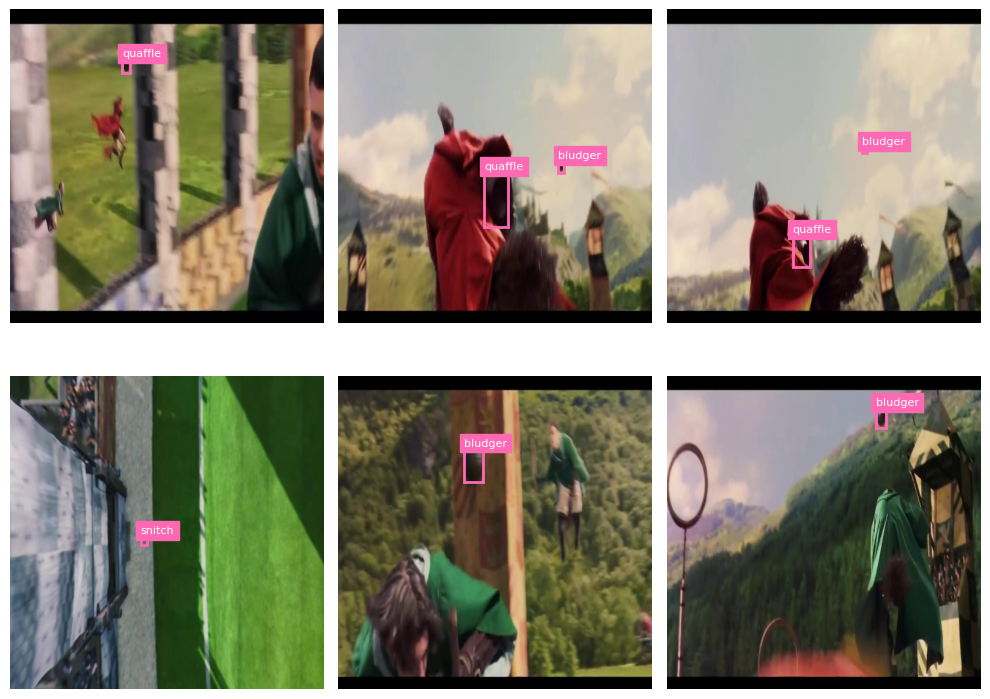

In [9]:
out = [train_ds[i] for i in range(6)]
visualize([o["image"] for o in out], [o["bboxes"] for o in out])

# Задача 3. 3 балла.
## YOLO-like детектор

Сейчас нам предстоить реализовать детектор, похожий на YOLO. Это один из самых простых детекторов с точки зрения реализации. YOLO описан в статье: [You Only Look Once: Unified, Real-Time Object Detection](https://arxiv.org/abs/1506.02640). Здесь мы его немного изменим и упростим. Будем использовать ResNet для извлечения признаков. На выходе мы будем получать карту признаков размера 16x16.

## Задача 3.1. 1 балл.

Первым делом нам нужно реализовать collate function. Это функция позволит нам кастомизировать, как именно батч конструируется из примеров (смотрите [pytorch docs](https://pytorch.org/docs/stable/data.html#dataloader-collate-fn) для деталей).

Это функция должна принять на вход лист прямоугольников и вернуть тензор размера Bx6x16x16. Первая размерность - это количество примеров в батче. Вторая -- "каналы", суть которых написана чуть ниже. Далее идут две пространственные размерности, это сетка 16 на 16. Зафиксируем порядок координат как (y, x) для этой сетки 16 на 16. Это значит, что в target идут ```cy_idx, cx_idx``` в таком порядке, см. код.

В шести "каналах" у нас будут записаны:
* Сдвиги центра bbox относительно начала клеточки (клеточка это "гиперпиксель" на изображении 16 на 16 на выходе сети). Записаны эти сдвиги будут в клеточку, к которой относятся. 2 канала (X, Y)
* Нормализованные ширина и высота bbox. 2 канала (W, H)
* Confidence сетки. Им мы будем пользоваться, чтобы фильтровать уверенность сетки в наличии bbox в данной клетке. Таргет содержит 1 там, где bbox есть, и 0 иначе. 1 канал
* Класс детекции (тот самый int, полученный из строки с названием)

### Пояснительная картинка.

Она обладает некоторым уровнем абстракции, чёрных например должно быть 512, а зелёная должна захватывать 32 маленькие черные. Но может будет понятнее :)

![image](https://i.imgur.com/13YVxAd.jpeg)

In [10]:
def collate_fn(batch, downsample=32):
    imgs, batch_boxes = map(list, (zip(*[(b["image"], b["bboxes"]) for b in batch])))

    imgs = torch.stack(imgs)
    b, _, h, w = imgs.shape

    target = imgs.new_zeros(b, 6, h // downsample, w // downsample)

    # Add sample index to targets
    for i, boxes in enumerate(batch_boxes):
        xmin, ymin, xmax, ymax, classes = map(
            torch.squeeze, torch.split(imgs.new_tensor(boxes), 1, dim=-1)
        )

        # Нормализуйте ширину и высоту, поделив на ширину и высоту исходного изображения
        x_cell =  w / (w // downsample)
        y_cell =  h / (h // downsample)

        # ширина и высота бибокса могут превышать размеры гиперпикселя
        # поэтому их мы нормируем на полноценные 512
        w_box =  (xmax - xmin) / w
        h_box =  (ymax - ymin) / h

        # Посчитайте координаты центра и сдвиги
        cx =  (xmin + xmax) / 2
        cy =  (ymin + ymax) / 2

        cx_idx =  (cx / x_cell).floor().long()
        cy_idx =  (cy / y_cell).floor().long()

        cx_box =  (cx - cx_idx * x_cell) / x_cell
        cy_box =  (cy - cy_idx * y_cell) / y_cell

        # cy_idx, потом cx_idx
        target[i, :, cy_idx, cx_idx] = torch.stack(
            [cx_box, cy_box, w_box, h_box, torch.ones_like(cx_box), classes]
        )

    return {"image": imgs, "target": target}

Следующей функцией Вы можете проверить свою реализацию. Проверка не является блокирующей.

In [11]:
def test_collate_fn() -> None:
    target1 = [100, 200, 200, 300, 2]  # xmin, ymin, xmax, ymax, class
    target2_1 = [0, 250, 200, 300, 0]  # xmin, ymin, xmax, ymax, class
    target2_2 = [0, 100, 100, 300, 1]  # xmin, ymin, xmax, ymax, class

    result = collate_fn(
        [
            {"image": torch.rand((3, 512, 512)), "bboxes": [target1]},
            {"image": torch.rand((3, 512, 512)), "bboxes": [target2_1, target2_2]},
        ]
    )

    # Проверяем размерности
    assert result["image"].shape == (2, 3, 512, 512)
    assert result["target"].shape == (2, 6, 16, 16)
    print(result["target"][0, :, 7, 4])
    # Проверяем значения клеточек, в которые попали ббоксы
    assert np.allclose(
        result["target"][0, :, 7, 4],
        torch.tensor([22 / 32, 26 / 32, 100 / 512, 100 / 512, 1, 2]),
    )
    assert np.allclose(
        result["target"][1, :, 8, 3],
        torch.tensor([4 / 32, 19 / 32, 200 / 512, 50 / 512, 1, 0]),
    )
    assert np.allclose(
        result["target"][1, :, 6, 1],
        torch.tensor([18 / 32, 8 / 32, 100 / 512, 200 / 512, 1, 1]),
    )

    # Проверяем, что все остальные клеточки содержат нули
    result["target"][0, :, 7, 4] = result["target"][1, :, 8, 3] = result["target"][
        1, :, 6, 1
    ] = torch.zeros(6)
    assert np.allclose(result["target"], 0)


test_collate_fn()

tensor([0.6875, 0.8125, 0.1953, 0.1953, 1.0000, 2.0000])


Ниже вы можете увидеть пример, как выглядит решетка размера 16 на 16 на исходном изображении:

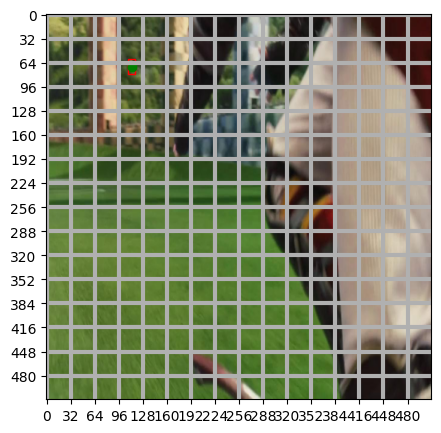

In [12]:
fig, ax = plt.subplots(figsize=(5, 5))
i = 20

img = train_ds[i]["image"].permute(1, 2, 0) * torch.tensor(std).view(
    1, 1, -1
) + torch.tensor(mean).view(1, 1, -1)
bboxes = torch.tensor(train_ds[i]["bboxes"])

ax.imshow(img)
loc = plt.matplotlib.ticker.MultipleLocator(base=32)
ax.xaxis.set_major_locator(loc)
ax.yaxis.set_major_locator(loc)
ax.grid(which="major", axis="both", linestyle="-", linewidth=3)

for bbox in bboxes:
    xmin, ymin, xmax, ymax = bbox[:-1]
    w = xmax - xmin
    h = ymax - ymin
    with_mask = bbox[-1]
    ax.add_patch(Rectangle((xmin, ymin), w, h, fill=False, color="red"))

cx = (bboxes[:, 0] + bboxes[:, 2]) / 2
cy = (bboxes[:, 1] + bboxes[:, 3]) / 2

ax.scatter(cx, cy, color="green", marker="o")

plt.show()

## Задача 3.2. 0.5 балла.

Выход нашей сетки будет несколько больше, чем Bx6x16x16. Почему?

Мы решаем задачу, где классов больше одного. Вспомним прошлое дз: target был одним числом, но выход сетки содержал длинный-длинный вектор, из которого мы получали вероятность принадлежности к тому или иному классу. Здесь то же самое, но как бы в двумерии: у каждой клеточки из этих 16*16 будет свой вектор длины C, который мы будем использовать для определения класса.

Реализуйте обратное относительно collate_fn преобразования, чтобы декодировать выход нейронной сети. Применив функцию decode_prediction к выходу collate function вы должны получить изначальный набор прямоугольников с корректными размерами и координатами, а также классами. Применив к выходу нейросети мы тоже должны получить набор прямоугольников и тоже с корректными классами.

То есть, нужно проделать операции из collate_fn в обратную сторону, но учесть, что у неройнки выход будет чуть длиннее, и там мы должны брать argmax для определения класса.

Hint: в target classes идут в конце. В нейронке они тоже будут в конце, но их будет больше 1. Можно проверять число каналов пришедшего объекта, если оно 6, то перед нами target и надо брать значение, которое записано в клеточке. Иначе (каналов больше 6) перед нами выход нейронки, и надо брать самый вероятный из них.

In [13]:
def decode_prediction(pred, upsample=32, threshold=0.7):
    b, c, h, w = pred.shape
    img_w, img_h = w * upsample, h * upsample

    results = []

    # Обрабатываем каждое изображение в батче
    for batch_idx in range(b):
        batch_boxes = []  # Боксы для текущего изображения

        # Вычисляем размер одной ячейки в пикселях исходного изображения
        x_cell = img_w / w
        y_cell = img_h / h

        # Проходим по всем ячейкам
        for cy_idx in range(h):
            for cx_idx in range(w):
                # Получаем предсказание для текущей ячейки
                cell_pred = pred[batch_idx, :, cy_idx, cx_idx]

                if c != 6: # Выход нейронки
                    cx_box, cy_box, w_box, h_box, confidence, *class_probs = cell_pred
                    if confidence < threshold:
                        continue
                    class_id = torch.argmax(torch.tensor(class_probs)) #ищем самый вероятный
                else: # target
                    cx_box, cy_box, w_box, h_box, confidence, class_id = cell_pred #берем значение
                    if confidence < threshold:
                        continue

                # Преобразуем относительные координаты в абсолютные
                cx = (cx_idx + cx_box) * x_cell
                cy = (cy_idx + cy_box) * y_cell

                # Преобразуем относительные размеры в абсолютные
                width = w_box * img_w
                height = h_box * img_h

                # Вычисляем координаты углов ограничивающего прямоугольника
                xmin = cx - width / 2
                xmax = cx + width / 2
                ymin = cy - height / 2
                ymax = cy + height / 2

                batch_boxes.append([xmin.item(), ymin.item(), xmax.item(), ymax.item(), class_id.item()])

        results.append(batch_boxes)

    return results

Следующей функцией Вы можете проверить свою реализацию. Проверка не является блокирующей.

In [14]:
def test_decode_predictions() -> None:
    # Применяем collate_fn к некоторым данным
    target1 = [[100, 200, 200, 300, 2]]
    target2 = [[0, 250, 200, 300, 0], [0, 100, 100, 300, 1]]
    result = collate_fn(
        [
            {"image": torch.rand((3, 512, 512)), "bboxes": target1},
            {"image": torch.rand((3, 512, 512)), "bboxes": target2},
        ]
    )

    target = result["target"]
    assert target.shape == (2, 6, 16, 16)
    # В таком виде target соответствует поиску одного класса - 6-ой канал.
    # Добавим еще 2 канала, чтобы проверить работу функции для нескольких классов
    target = torch.cat(
        [target, torch.zeros(2, 2, 16, 16)], dim=1
    )  # Добавляем два канала
    assert target.shape == (2, 8, 16, 16)  # Теперь их стало 8

    target[0, 5:, 7, 4] = torch.tensor([0.5, 0.6, 0.9])  # Это должен быть класс 2
    target[1, 5:, 8, 3] = torch.tensor([0.9, 0.6, 0.5])  # Это должен быть класс 0
    target[1, 5:, 6, 1] = torch.tensor([0.6, 0.9, 0.5])  # Это должен быть класс 1

    # Считаем результат
    actual = decode_prediction(target)
    print("Actual:  ", actual)

    # Порядок ббоксов для target2 может меняться в зависимости от вашей реализации и это не ошибка.
    # Скорее всего, он будет такой. Но если ассерт не проходит, попробуйте поменять их местами.
    expected = [target1, [target2[1], target2[0]]]
    # expected = [ target1, [ target2[0], target2[1] ] ] # <-- такой ответ тоже правильный.
    print("Expected:", expected)

    # Сравниваем
    assert actual == expected


test_decode_predictions()

Actual:   [[[100.0, 200.0, 200.0, 300.0, 2]], [[0.0, 100.0, 100.0, 300.0, 1], [0.0, 250.0, 200.0, 300.0, 0]]]
Expected: [[[100, 200, 200, 300, 2]], [[0, 100, 100, 300, 1], [0, 250, 200, 300, 0]]]


## Задача 3.3. 1 балл.
Реализуйте модель. Первым делом примените первые 4 блока (до layer4 включительно) ResNet50. Далее добавьте несколько блоков (Conv2D, BatchNorm2D, ReLU). Постепенно уменьшайте количество каналов до 5+C, а размер изображения до 16 на 16. Например, 2048 -> 512 -> 128 -> 32 -> 5+C, где С - количество классов в вашем датасете. Размер ядра при этом 3, паддинг 1. Но вариантов много, попробуйте разные! **Последним слоем обязательно должна быть свертка.** Так как все значения, которые мы предсказываем, находятся в отрезке от 0 до 1 (благодаря нормировке с клеточками), мы после финальной свертки еще применим сигмоиду. Для классов в такой постановке это не навредит.

Если будете фантазировать, то для получения правильного размера изображения после сети не стесняйтесь применять слои с фильтрами больше 3.

In [15]:
C =  3

class Detector(nn.Module):
    def __init__(self):
        super().__init__()
        model = torchvision.models.resnet50(weights=ResNet50_Weights.DEFAULT)
        # Первые 4 блока
        lst =  list(model.children())[:-2]
        self.net = nn.Sequential(
            *lst,
            nn.Conv2d(2048, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),

            nn.Conv2d(512, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),

            nn.Conv2d(128, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),

            nn.Conv2d(32, 5 + C, kernel_size=3, padding=1),
            nn.Sigmoid()
        )

    def forward(self, img):
        features = self.net(img)
        return features

## Задача 3.4. 0.5 балла.

Реализуйте функцию потерь.

Для этого:
* Сделайте маску, которая будет говорить о положении детектируемых объектов. Её нужно использовать с помощью masked_select (см. доки PyTorch)
* Лосс похож на оригинальный для Yolo V1 и состоит из 4 частей (reduction='sum' для всех)
    - localization loss - Мы берем MSE по координатам бокса там, где есть детектируемый объект
    - box_loss - MSE от корней ширины и высоты bbox там, где есть детектируемый объект
    - classification_loss - Если детектируемый объект есть, то его кросс-энтропия по его классу
    - confidence_loss - Бинарная кросс-энтропия факта наличия объекта ДЛЯ ВСЕХ пикселей. Делается отдельно для детектируемых объектов (вес 1) и для недетектируемых (вес 0.1 например, поскольку их гораздо больше, но можно экспериментировать)


* Если будете делать описанное выше, то учтите reduction. Бинарная кросс-энтропия вызывается через BCELoss. Параметр C используется для задачи числа классов. Подумайте как зависит индексация от параметра C и используйте его.

In [16]:
def special_loss(pred, target, C=3):
    conf_loss = nn.BCELoss(reduction='sum')
    geom_loss = nn.MSELoss(reduction='sum')
    clas_loss = nn.CrossEntropyLoss(reduction='sum')
    obj_mask = (target[:, 4, :, :] == 1)
    no_obj_mask = (target[:, 4, :, :] == 0)

    localization_loss = geom_loss(pred[:, 0, :, :][obj_mask], target[:, 0, :, :][obj_mask]) + \
                       geom_loss(pred[:, 1, :, :][obj_mask], target[:, 1, :, :][obj_mask])

    box_loss = geom_loss(torch.sqrt(pred[:, 2, :, :][obj_mask]), torch.sqrt(target[:, 2, :, :][obj_mask])) + \
               geom_loss(torch.sqrt(pred[:, 3, :, :][obj_mask]), torch.sqrt(target[:, 3, :, :][obj_mask]))

    classification_loss = clas_loss(pred[:, 5:5+C, :, :].permute(0, 2, 3, 1).contiguous()[obj_mask], target[:, 5, :, :].long()[obj_mask])
    confidence_loss = conf_loss(pred[:, 4, :, :][obj_mask], target[:, 4, :, :][obj_mask]) + \
                      0.1 * conf_loss(pred[:, 4, :, :][no_obj_mask], target[:, 4, :, :][no_obj_mask])

    total_loss = localization_loss + box_loss + classification_loss + confidence_loss

    return total_loss

Из источников использовала [Yolo](https://juliusruseckas.github.io/ml/simple-yolo.html) и формул из лекции

# Задача 4. 1 балла.

Обучите вашу модель (написав цикл обучения), и покажите что она работает (скорее всего, объекты найдутся на 1-2 картинках).

In [17]:
loader = torch.utils.data.DataLoader(train_ds, 10, collate_fn=collate_fn)

In [18]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

torch.manual_seed(21)
EPOCHS = 20 # Harry Potter 20, Cards 15
model = Detector().to(device)
opt = torch.optim.AdamW(model.parameters(), lr=1e-3)

for e in tqdm(range(EPOCHS)):
    epoch_losses = []
    pbar = tqdm(loader, leave=False)

    for batch in pbar:
        images = batch['image'].to(device)
        targets = batch['target'].to(device)
        preds = model(images)
        loss = special_loss(preds, targets, C=len(train_ds.class_dict))
        opt.zero_grad()
        loss.backward()
        opt.step()

        epoch_losses.append(loss.item())

    print(f"Epoch {e} done; Train loss {np.mean(epoch_losses):.3f};")

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 73.3MB/s]


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 0 done; Train loss 92.482;


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 1 done; Train loss 30.446;


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 2 done; Train loss 18.850;


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 3 done; Train loss 15.567;


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 4 done; Train loss 13.710;


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 5 done; Train loss 11.252;


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 6 done; Train loss 9.875;


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 7 done; Train loss 9.299;


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 8 done; Train loss 8.151;


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 9 done; Train loss 7.666;


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 10 done; Train loss 7.307;


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 11 done; Train loss 7.048;


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 12 done; Train loss 6.869;


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 13 done; Train loss 6.744;


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 14 done; Train loss 6.657;


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 15 done; Train loss 6.624;


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 16 done; Train loss 6.603;


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 17 done; Train loss 6.513;


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 18 done; Train loss 6.436;


  0%|          | 0/26 [00:00<?, ?it/s]

Epoch 19 done; Train loss 6.426;


Запустим обученный детектор на тестовых изображениях:

In [19]:
test_loader = torch.utils.data.DataLoader(test_ds, 6, collate_fn=collate_fn)
i = iter(test_loader)
batch = next(i)

In [20]:
images = batch['image'].to(device)
predictions = model(images).cpu()

decoded_predictions = decode_prediction(predictions)

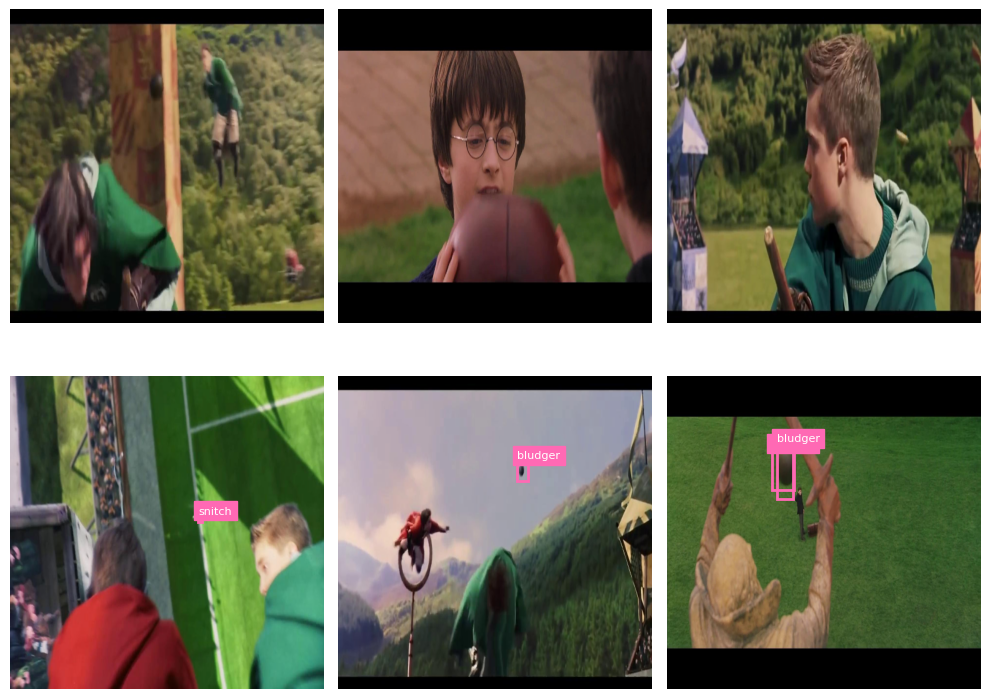

In [21]:
visualize(batch['image'], decoded_predictions)

Результат сильно так себе, да? Есть множество вариантов улучшений, самый простой из которых это приделать к выходу [NMS](https://paperswithcode.com/method/non-maximum-suppression#:~:text=Non%20Maximum%20Suppression%20is%20a,below%20a%20given%20probability%20bound.). Если хочется, можно почитать про YOLO v1 [тут](https://arxiv.org/abs/1506.02640).

# Задача 4 but better (1 балл)

## Прикручиваем NMS :^)

Напомним принцип работы алгоритма:
- Сортируем bbox в порядке убывания уверенности
- Считаем Intersection over Union (IoU) для всех bbox
- Выкидываем все, пересечение с которыми больше порога
- Идем дальше по списку, пока не дойдем до конца

In [22]:
def NMS(bboxes, threshold, visual):
    if len(bboxes) == 0:
        return []

    # Конвертируем в тензор
    bboxes = torch.tensor(bboxes)

    # Сортируем  в порядке убывания уверенности
    confidences = bboxes[:, 4]
    _, sorted_indices = torch.sort(confidences, descending=True)
    bboxes = bboxes[sorted_indices]

    selected_boxes = []

    while len(bboxes) > 0:
        # Берем bbox с наибольшей уверенностью
        current_box = bboxes[0]
        if visual == True:
            selected_boxes.append([current_box[0].item(),
                                 current_box[1].item(),
                                 current_box[2].item(),
                                 current_box[3].item(),
                                 current_box[5].item()])# без confidence для вызова функции визуализации
        else:
            selected_boxes.append(current_box.tolist())

        # Если это был последний bbox
        if len(bboxes) == 1:
            break

        # Удаляем текущий bbox из рассмотрения
        bboxes = bboxes[1:]

        # Вычисляем IoU текущего bbox с остальными
        x1 = torch.max(current_box[0], bboxes[:, 0])
        y1 = torch.max(current_box[1], bboxes[:, 1])
        x2 = torch.min(current_box[2], bboxes[:, 2])
        y2 = torch.min(current_box[3], bboxes[:, 3])

        interArea = torch.clamp(x2 - x1 + 1, min=0) * torch.clamp(y2 - y1 + 1, min=0)
        box1Area = (current_box[2] - current_box[0] + 1) * (current_box[3] - current_box[1] + 1)
        box2Area = (bboxes[:, 2] - bboxes[:, 0] + 1) * (bboxes[:, 3] - bboxes[:, 1] + 1)

        iou = interArea / (box1Area + box2Area - interArea).float()

        # Оставляем только bbox с IoU меньше порога
        mask = iou <= threshold
        bboxes = bboxes[mask]

    return selected_boxes

Из источников использовала [iou](https://pyimagesearch.com/2016/11/07/intersection-over-union-iou-for-object-detection/#:~:text=def%20bb_intersection_over_union(,return%20iou)

In [23]:
def decode_prediction_nms(pred, upsample=32, threshold=0.7, visual = True):
    b, c, h, w = pred.shape
    img_w, img_h = w * upsample, h * upsample

    results = []

    for batch_idx in range(b):
        batch_boxes = []

        # Размер одной ячейки в пикселях исходного изображения
        x_cell = img_w / w
        y_cell = img_h / h

        # Проходим по всем ячейкам
        for cy_idx in range(h):
            for cx_idx in range(w):
                # Получаем предсказание для текущей ячейки
                cell_pred = pred[batch_idx, :, cy_idx, cx_idx]

                cx_box, cy_box, w_box, h_box, confidence, *class_probs = cell_pred

                if confidence < threshold:
                    continue

                # Определяем класс с максимальной вероятностью
                class_id = torch.argmax(torch.tensor(class_probs)).item()

                # Преобразуем относительные координаты в абсолютные
                cx = (cx_idx + cx_box) * x_cell
                cy = (cy_idx + cy_box) * y_cell

                # Преобразуем относительные размеры в абсолютные
                width = w_box * img_w
                height = h_box * img_h

                # Вычисляем координаты углов ограничивающего прямоугольника
                xmin = cx - width / 2
                ymin = cy - height / 2
                xmax = cx + width / 2
                ymax = cy + height / 2

                batch_boxes.append([xmin.item(), ymin.item(), xmax.item(), ymax.item(), confidence.item(), class_id])

        # Применяем NMS к bbox текущего изображения
        filtered_boxes = NMS(batch_boxes, threshold, visual)
        results.append(filtered_boxes)

    return results

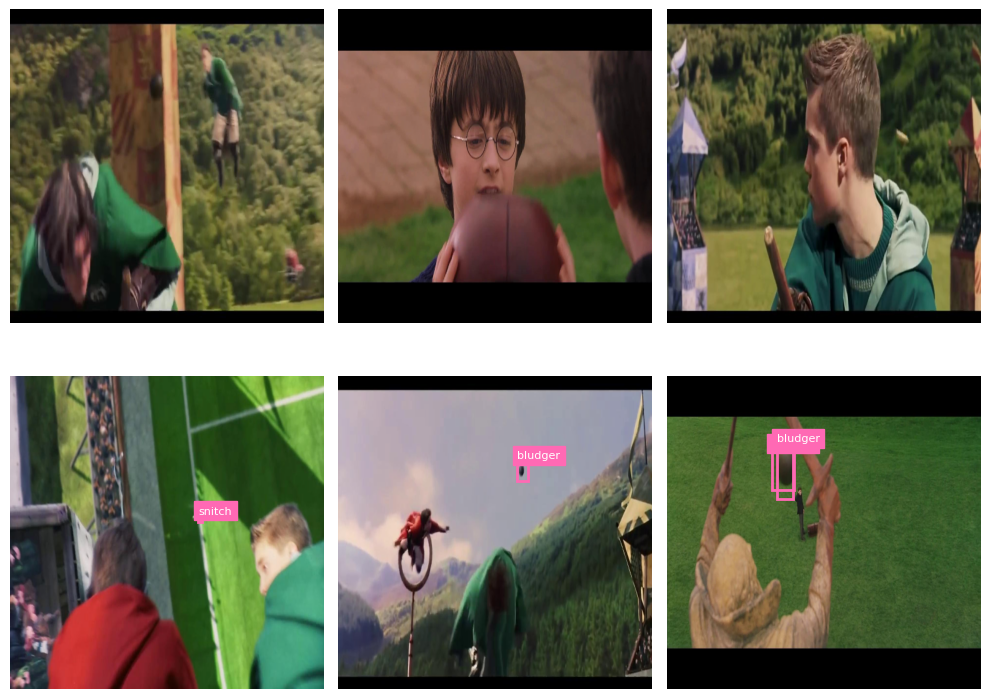

In [24]:
images = batch['image'].to(device)
predictions = model(images)

decode_predictions_nms = decode_prediction_nms(predictions)
visualize(batch['image'], decode_predictions_nms)

# Задача 5. 3.5 балла.

Займёмся более простыми вещами. Возьмем готовую архитектуру, обучим её на наших данных и посмотрим.

Для этого будем использовать YOLO 11 от ultralytics.

## Задача 5.1. 1.5 балла.

Чтобы дальше модель обучалась одной строкой, данные нужно переложить в правильный формат. Да-да, классика перекладывания JSON. Как правильно паковать можно посмотреть [тут](https://roboflow.com/formats/yolov8-pytorch-txt).

Если коротко:
* Есть .yaml, где живут пути к папкам с картинками, количество классов и их названия
* Есть папочки train valid (их поможем вам собрать), в них две подпапки:
    - Первая images, в ней лежат картинки
    - Вторая labels, в ней лежат файлы с названиями как у картинок, но вместо расширения картинок нужен .txt, внутри формат как описан на Roboflow


In [25]:
# Делаем папочки
!rm -rf train
!rm -rf valid
!rm -rf runs
!rm -rf yolo11n.pt
!mkdir -p train/images train/labels valid/images valid/labels

Реализуйте функцию, которая принимает аннотации в изначальном формате, а возвращает их в нужном для YOLO 11. Это должен быть массив готовых строк, которые можно сразу забрасывать в файлик, добавив \n.

Использовать сторонние инструменты нельзя, нужно переложить своими руками.

In [26]:
def annotation2txt(bboxes, w_im, h_im):
    lines = []

    for bbox in bboxes:
        xmin, ymin, xmax, ymax, class_id = bbox

        # Координаты центра
        x_center = (xmin + xmax) / 2 / w_im
        y_center = (ymin + ymax) / 2 / h_im

        # Ширина и высота
        width = (xmax - xmin) / w_im
        height = (ymax - ymin) / h_im

        line = f"{class_id} {x_center} {y_center} {width} {height}"
        lines.append(line)

    return lines

In [27]:
# Копируем картиночки по папочкам и создаем txt файлики


for i in range(len(train_ds)):
    result = train_ds.__get_raw_item__(i)
    shutil.copyfile(
        result[0],
        "./train/images/" + result[0].split("/")[-1],
    )

    h_im, w_im, ch = np.array(Image.open(result[0])).shape
    with open(
        "./train/labels/" + result[0].split("/")[-1].split(".")[0] + ".txt",
        "w",
        encoding="utf8",
    ) as f:
        f.write("\n".join(annotation2txt(result[1], w_im, h_im)))

for i in range(len(test_ds)):
    result = test_ds.__get_raw_item__(i)

    shutil.copyfile(
        result[0],
        "./valid/images/" + result[0].split("/")[-1],
    )
    h_im, w_im, ch = np.array(Image.open(result[0])).shape
    with open(
        "./valid/labels/" + result[0].split("/")[-1].split(".")[0] + ".txt",
        "w",
        encoding="utf8",
    ) as f:
        f.write("\n".join(annotation2txt(result[1], w_im, h_im)))

In [28]:
# Собираем YAML

nc =  3 # Укажите число классов. Хоть руками, хоть по-умному посчитайте (см. class_dict)
names = ["snitch", "quaffle", "bludger"] # Укажите имена классов. Хоть руками, хоть по-умному посчитайте, это массив строк (см. class_dict)

with open("data.yaml", "w") as f:
    f.write(f"""train: ../train/images
val: ../valid/images

nc: {nc}
names: {names}""")

## Задание 5.2. 1.5 балла.

Обучите модель YOLO 11 самого маленького размера. Библиотека максимально friendly, от вас требуется написать две строчки. Модель можно взять обученную.

Подсказка: подумайте зачем вам data.yaml и что такое yolo11n.yaml (не стесняйтесь гуглить)

Если у вас лосс NaN или Windows, то есть несколько полезных ссылок (покрывают не все существующие проблемы, но может поможет вам):

https://github.com/ultralytics/ultralytics/issues/1149

https://github.com/ultralytics/yolov5/issues/6907

https://stackoverflow.com/questions/75178762/i-got-nan-for-all-losses-while-training-yolov8-model

In [29]:
from ultralytics import YOLO
model_yolo = YOLO('yolo11n.pt').to(device)
results_train = model_yolo.train(data="data.yaml", epochs=20)

100%|██████████| 5.35M/5.35M [00:00<00:00, 161MB/s]

engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, profile=False, project=None, rect=False, resume=False, retina_masks=False, save=True, save_conf

100%|██████████| 755k/755k [00:00<00:00, 35.9MB/s]

Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

YOLO11n summary: 181 layers, 2,590,425 parameters, 2,590,409 gradients, 6.4 GFLOPs

Transferred 448/499 items from pretrained weights
Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1348.9±592.6 MB/s, size: 49.5 KB)


train: Scanning /content/train/labels... 254 images, 0 backgrounds, 0 corrupt: 100%|██████████| 254/254 [00:00<00:00, 2416.78it/s]

train: New cache created: /content/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 888.0±638.2 MB/s, size: 65.7 KB)


val: Scanning /content/valid/labels... 29 images, 0 backgrounds, 0 corrupt: 100%|██████████| 29/29 [00:00<00:00, 2257.22it/s]

val: New cache created: /content/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20       5.9G      1.376      4.712      1.162         29        640: 100%|██████████| 16/16 [00:06<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]

                   all         29         31    0.00221      0.612     0.0121    0.00833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      5.92G      1.447      3.807      1.098         25        640: 100%|██████████| 16/16 [00:04<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.40it/s]

                   all         29         31    0.00257      0.697       0.17      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      5.93G       1.44      3.434      1.118         32        640: 100%|██████████| 16/16 [00:04<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.47it/s]

                   all         29         31    0.00204      0.556      0.269      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      5.95G      1.452      2.965      1.134         29        640: 100%|██████████| 16/16 [00:04<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.92it/s]

                   all         29         31    0.00291       0.79      0.383      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      5.96G       1.36      2.653      1.068         28        640: 100%|██████████| 16/16 [00:05<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.88it/s]

                   all         29         31      0.792       0.23      0.554      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      5.98G      1.305       2.41      1.078         32        640: 100%|██████████| 16/16 [00:04<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.14it/s]

                   all         29         31      0.534      0.304      0.446      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      5.99G      1.313       2.38      1.028         25        640: 100%|██████████| 16/16 [00:04<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

                   all         29         31      0.882      0.375      0.593      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      6.01G      1.285      2.167      1.032         28        640: 100%|██████████| 16/16 [00:04<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.90it/s]

                   all         29         31      0.711       0.57       0.74      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      6.02G      1.187      1.953      1.026         29        640: 100%|██████████| 16/16 [00:04<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all         29         31      0.805      0.582      0.678      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      6.04G      1.171      1.865      1.015         22        640: 100%|██████████| 16/16 [00:04<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.12it/s]

                   all         29         31      0.835      0.554      0.725      0.509


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      6.05G      1.279       2.55       1.06         17        640: 100%|██████████| 16/16 [00:05<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.89it/s]

                   all         29         31      0.649      0.523        0.6      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      6.07G      1.191      2.324      1.023         17        640: 100%|██████████| 16/16 [00:05<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]

                   all         29         31      0.859      0.778      0.825      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      6.08G      1.156      2.126     0.9872         17        640: 100%|██████████| 16/16 [00:04<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.43it/s]

                   all         29         31      0.694      0.816      0.725      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20       6.1G      1.077      2.074      0.981         15        640: 100%|██████████| 16/16 [00:04<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.90it/s]

                   all         29         31      0.859       0.85      0.799      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      6.11G      1.073      1.883     0.9867         19        640: 100%|██████████| 16/16 [00:04<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.57it/s]

                   all         29         31      0.925      0.824      0.895      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      6.13G      1.027       1.92     0.9704         12        640: 100%|██████████| 16/16 [00:04<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.85it/s]

                   all         29         31      0.933      0.821      0.912      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      6.14G      1.091      1.824     0.9954         15        640: 100%|██████████| 16/16 [00:05<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]

                   all         29         31      0.899      0.834      0.885      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      6.16G      1.038       1.75     0.9598         17        640: 100%|██████████| 16/16 [00:04<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.69it/s]

                   all         29         31      0.969       0.82      0.902      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      6.17G      1.011      1.717     0.9423         16        640: 100%|██████████| 16/16 [00:04<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.99it/s]

                   all         29         31      0.973      0.785      0.919      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      6.19G      1.024       1.65     0.9442         13        640: 100%|██████████| 16/16 [00:04<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.25it/s]


                   all         29         31      0.848      0.868      0.901      0.683

20 epochs completed in 0.031 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.4MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.4MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.133 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.88it/s]


                   all         29         31      0.972      0.785      0.919      0.693
                snitch          8          8          1      0.733      0.847      0.622
               quaffle         13         13      0.992      0.923      0.959       0.71
               bludger          9         10      0.923        0.7      0.952      0.747
Speed: 0.1ms preprocess, 1.1ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/train


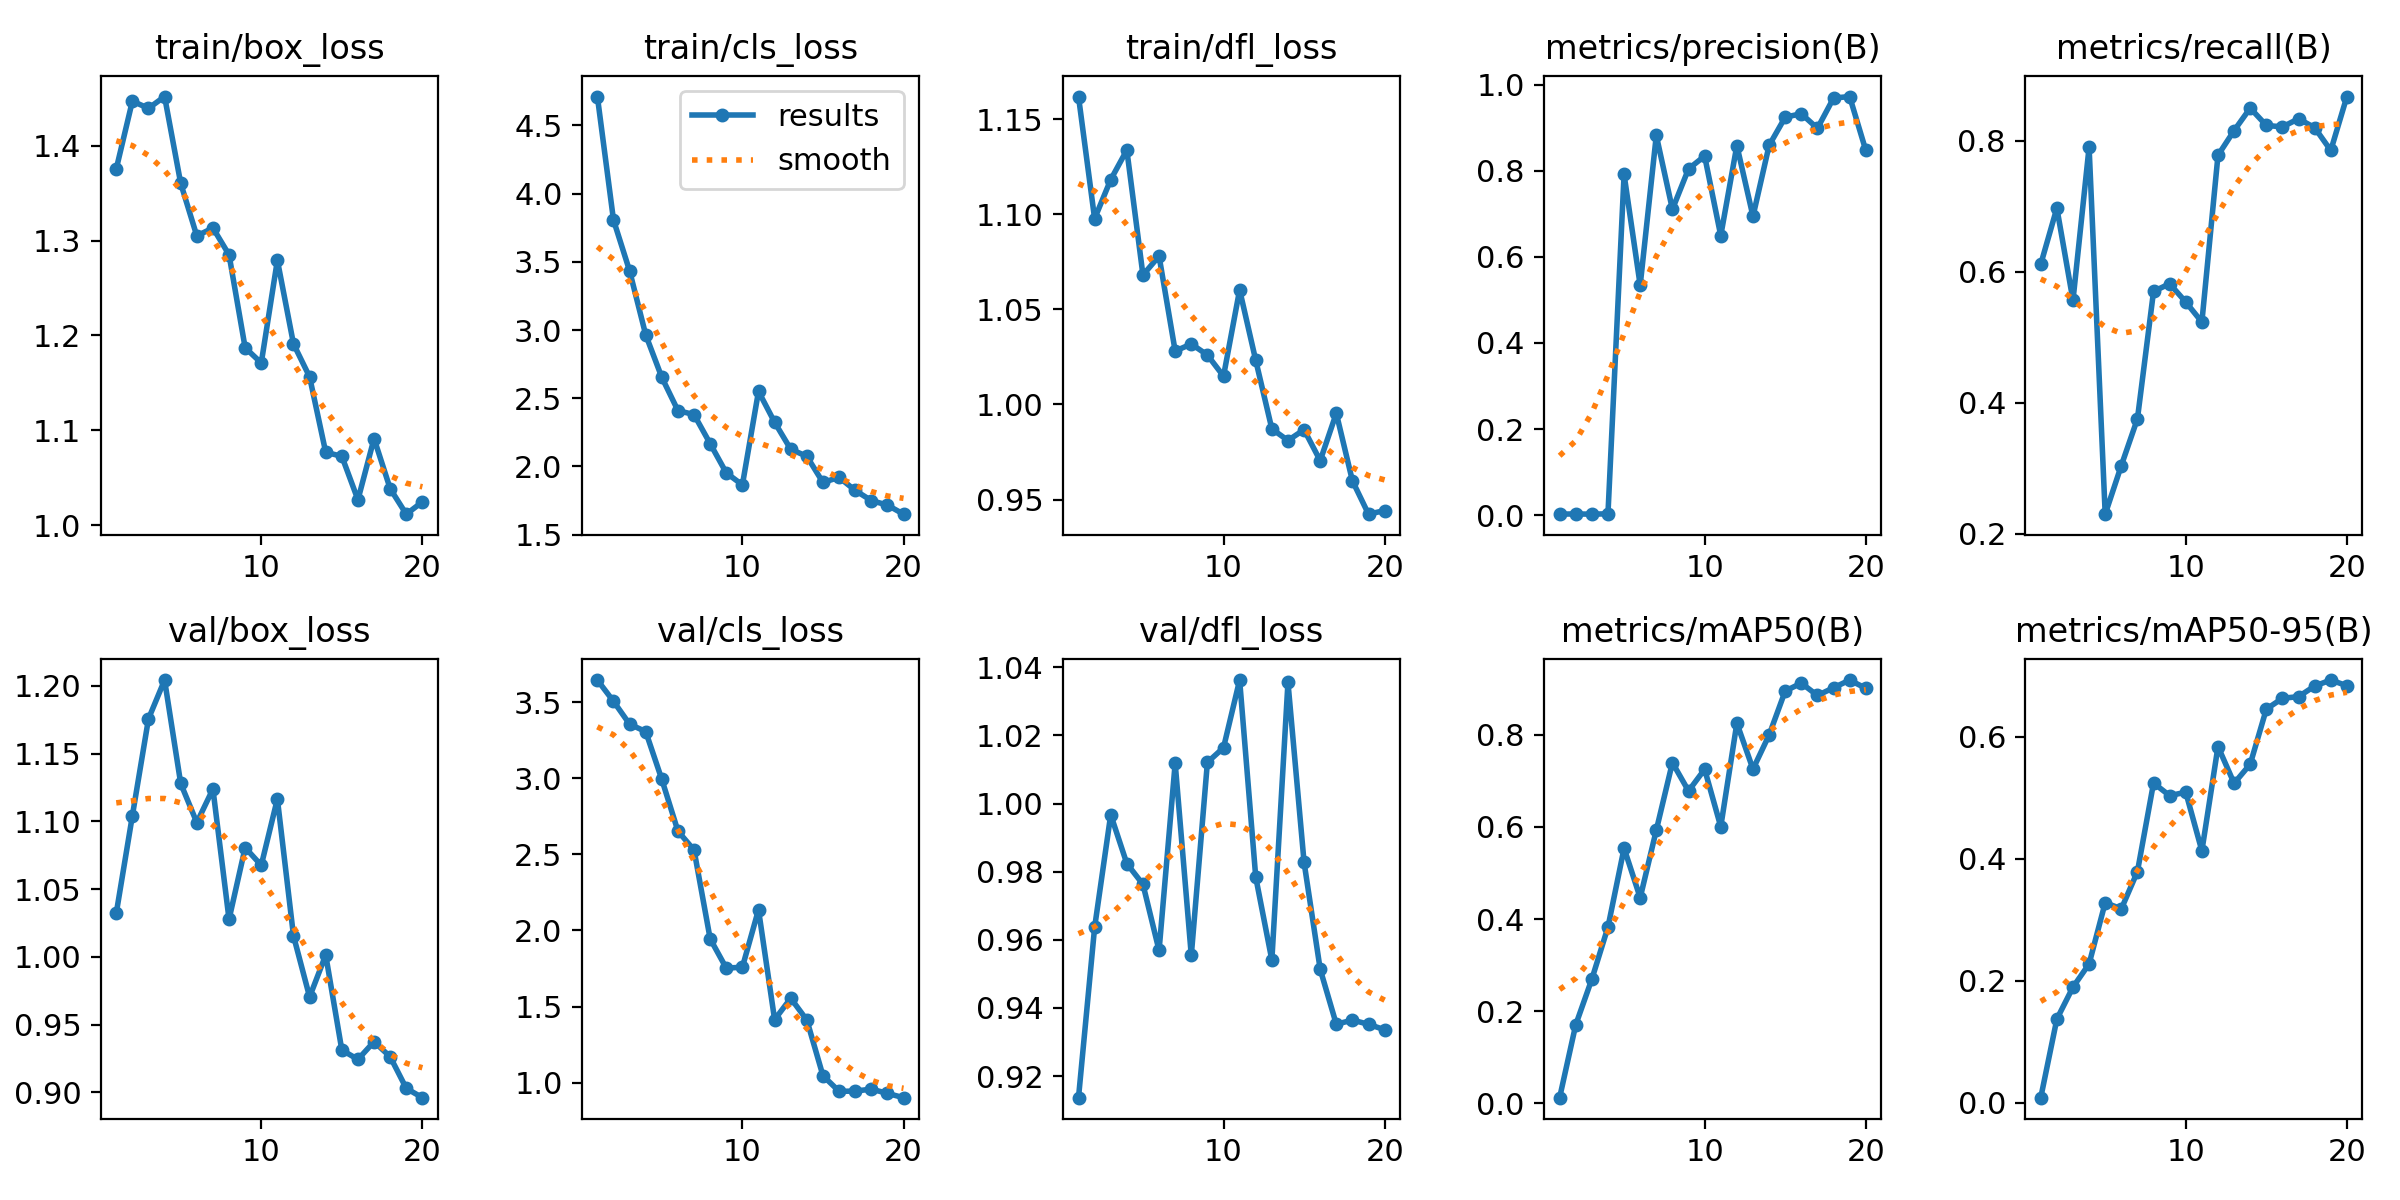

In [30]:
from IPython import display
display.Image("runs/detect/train/results.png")

## Задание 5.3. 0.5 балла.

Как-нибудь отрисуйте предсказания на валидационной выборке (хотя бы части из 5-10 картинок).

Здесь можно использовать костыли с параметром save=True у predict, потом прочитать их чем-нибудь, отрисовать матплотлибом. Есть варианты и получше. Дефолтный show будет пытаться показывать через opencv imshow, он в коллабе работать не будет.

In [31]:
def visualize_yolo_results(results, model, n_images=6, figsize=(20, 10)):

    n_cols = min(3, n_images)
    n_rows = (n_images + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.ravel() if isinstance(axes, np.ndarray) else [axes]

    for i, ax in enumerate(axes):
        ax.axis('off')

        if i >= min(n_images, len(results)):
            continue

        r = results[i]
        img = Image.open(r.path)
        ax.imshow(img)

        for box in r.boxes:
            x1, y1, x2, y2 = box.xyxy[0].tolist()
            cls = int(box.cls)
            conf = float(box.conf)
            rect = Rectangle(
                (x1, y1), x2-x1, y2-y1,
                fill=False, color='#FF69B4', linewidth=2
            )
            ax.add_patch(rect)
            ax.text(
                x1, y1,
                f'{model.names[cls]} {conf:.2f}',
                color='white', backgroundcolor='#FF69B4', fontsize=8
            )

    fig.tight_layout()
    plt.show()


image 1/29 /content/valid/images/1.jpg: 320x640 1 quaffle, 76.3ms
image 2/29 /content/valid/images/100.jpg: 320x640 1 quaffle, 13.0ms
image 3/29 /content/valid/images/104.jpg: 320x640 1 quaffle, 15.7ms
image 4/29 /content/valid/images/107.jpg: 384x640 (no detections), 73.8ms
image 5/29 /content/valid/images/108.jpg: 320x640 1 snitch, 13.2ms
image 6/29 /content/valid/images/146.jpg: 384x640 (no detections), 12.7ms
image 7/29 /content/valid/images/15.jpg: 320x640 1 bludger, 13.1ms
image 8/29 /content/valid/images/159.jpg: 384x640 (no detections), 15.4ms
image 9/29 /content/valid/images/164.jpg: 384x640 1 snitch, 12.4ms
image 10/29 /content/valid/images/168.jpg: 320x640 1 quaffle, 12.3ms
image 11/29 /content/valid/images/186.jpg: 384x640 1 quaffle, 1 bludger, 12.8ms
image 12/29 /content/valid/images/197.jpg: 384x640 1 bludger, 12.8ms
image 13/29 /content/valid/images/210.jpg: 320x640 1 bludger, 12.6ms
image 14/29 /content/valid/images/216.jpg: 320x640 1 quaffle, 11.8ms
image 15/29 /conte

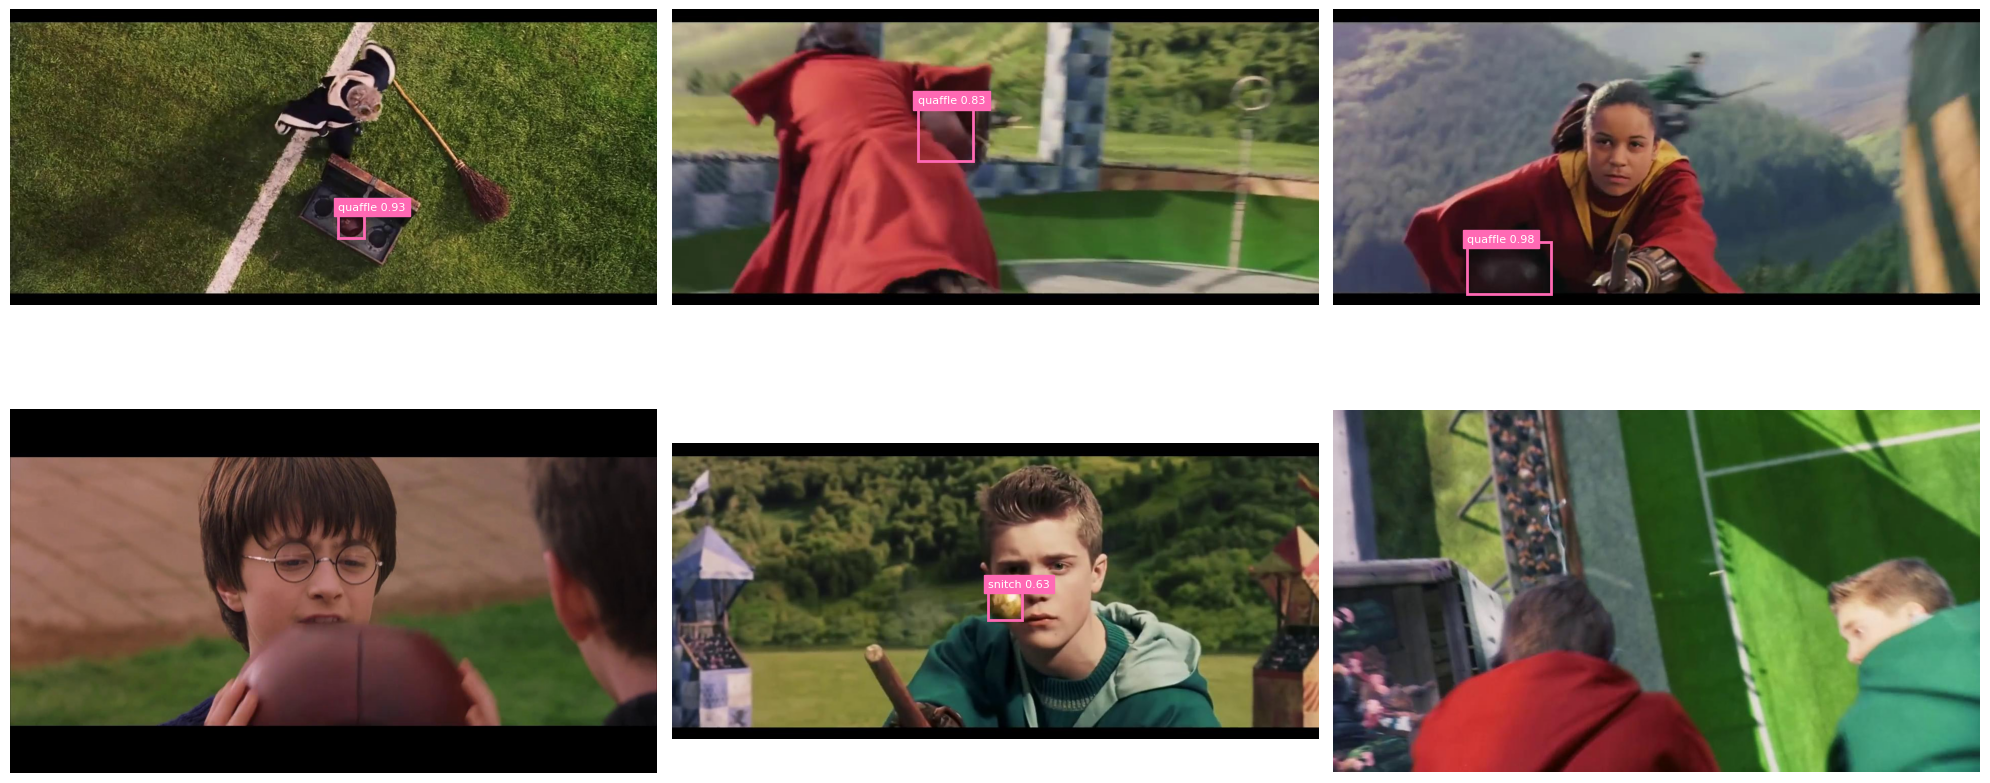

In [32]:
results = model_yolo.predict(source='valid/images')
visualize_yolo_results(results, model_yolo, 6)

## Бонус (1 балл)

Реализуйте подсчет mAP для самописной модели. Если найдете готовый код на гитхабах -- используйте с указанием ссылок :)

Сравните свою модель с YOLO11. Что получается?

In [33]:
!pip install torchmetrics -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.5/961.5 kB 30.6 MB/s eta 0:00:00


In [34]:
from torchmetrics.detection import MeanAveragePrecision

def calculate_map(model, dataloader, device, num_classes):
    metric = MeanAveragePrecision(class_metrics=True)
    model.eval()

    with torch.no_grad():
        for batch in tqdm(dataloader):
            images = batch['image'].to(device)
            targets = batch['target']

            _, _, img_h, img_w = images.shape

            # Получаем предсказания
            preds = model(images)
            decoded_preds = decode_prediction_nms(preds.cpu(), visual = False) # visual = False чтобы выводить ещё и confidence

            # Преобразуем в формат torchmetrics
            metric_preds = []
            for img_preds in decoded_preds:
                boxes = []
                scores = []
                labels = []
                for pred in img_preds:
                    boxes.append(pred[:4])
                    scores.append(pred[4])
                    labels.append(pred[5])
                metric_preds.append({
                    'boxes': torch.tensor(boxes),
                    'scores': torch.tensor(scores),
                    'labels': torch.tensor(labels, dtype=torch.int64)
                })

            # Преобразуем ground truth
            metric_targets = []
        for i in range(len(targets)):
            boxes = []
            labels = []
            for cy in range(targets[i].shape[1]):
                for cx in range(targets[i].shape[2]):
                    if targets[i][4, cy, cx] == 1:
                        cx_box, cy_box, w_box, h_box, _, class_id = targets[i][:, cy, cx]
                        x_cell = img_w / targets[i].shape[2]
                        y_cell = img_h / targets[i].shape[1]
                        cx_abs = (cx + cx_box) * x_cell
                        cy_abs = (cy + cy_box) * y_cell
                        w_abs = w_box * img_w
                        h_abs = h_box * img_h
                        boxes.append([
                            cx_abs - w_abs/2,
                            cy_abs - h_abs/2,
                            cx_abs + w_abs/2,
                            cy_abs + h_abs/2
                        ])
                        labels.append(class_id)
            metric_targets.append({
                'boxes': torch.tensor(boxes),
                'labels': torch.tensor(labels).to(torch.int64)
            })

        metric.update(metric_preds, metric_targets)

    result = metric.compute()
    return result

In [35]:
custom_map = calculate_map(model, test_loader, device, 3)

# Для YOLO11
yolo_map = model_yolo.val(source='valid/images').results_dict
print("Сравнение метрик:")
print(f"Самописная модель mAP@0.5: {custom_map['map_50']}")
print(f"YOLO11n mAP@0.5: {yolo_map['metrics/mAP50(B)']}")
print(f"Самописная модель mAP@0.5:0.95: {custom_map['map']}")
print(f"YOLO11n mAP@0.5:0.95: {yolo_map['metrics/mAP50-95(B)']}")

  0%|          | 0/5 [00:00<?, ?it/s]

Ultralytics 8.3.133 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1771.8±334.2 MB/s, size: 54.3 KB)


val: Scanning /content/valid/labels.cache... 29 images, 0 backgrounds, 0 corrupt: 100%|██████████| 29/29 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.23it/s]


                   all         29         31       0.94      0.788      0.911      0.685
                snitch          8          8          1      0.742      0.831      0.617
               quaffle         13         13      0.906      0.923      0.945      0.694
               bludger          9         10      0.913        0.7      0.958      0.745
Speed: 3.7ms preprocess, 24.7ms inference, 0.0ms loss, 5.5ms postprocess per image
Results saved to runs/detect/train2
Сравнение метрик:
Самописная модель mAP@0.5: 0.1683168262243271
YOLO11n mAP@0.5: 0.9114851551956815
Самописная модель mAP@0.5:0.95: 0.03366336598992348
YOLO11n mAP@0.5:0.95: 0.6851777228733559


Из источников использовала [map](https://pyimagesearch.com/2022/05/02/mean-average-precision-map-using-the-coco-evaluator/)